# PhD proposal - Matteo Pompili
$\newcommand{\ket}[1]{|{#1}\rangle} 
\newcommand{\bra}[1]{\langle{#1}|} 
\newcommand{\braket}[1]{\langle{#1}\rangle}$

## Research goal

The goal of my PhD is: **Demonstration of quantum applications on a multi-node network**

## Achieved so far

### Experimentally

So far I built a new setup (LT5) that will act as one of the nodes in three-node experiment.
By the end of November we should be able to generate entanglement between LT5 and LT4. 

### Courses

#### January 2018
+ Collaboration across disciplines (? GSC)

#### October 2018  

+ Conversation skills (2 GSC)

#### November 2018

+ Casimir Course - Programming (5 GSC)
+ <del>The Art of Presenting Science (5 GSC)<del>
+ QuTech Academy - Quantum Communication and Cryptography (5 GSC)

#### December 2018

+ Casimir Course - Electronics for Physicists (5 GSC)

### Supervision

I have been supervising Hans K. C. Beukers, a MSc student, since February. He has been working on improvements that, if successful, will increase the lifetime of our memory qubits.

### Outreach

I carried out two outreach activities within my MSCA network (*Spin-NANO*):

+ January 2018, Sheffield, UK. Introduction to quantum- and nano-technologies to local high-school students.
+ September 2018, Brussels, BE. Two days stand about quantum technologies at the ERN, EU Parlamentarium, mainly to children between 5 and 10.

## Plan

#### 2019

*Demonstrate the generation of a 3-node GHZ state* and use it to test violation of an appropriate inequality.
One of the nodes will use a memory qubit. (First half of 2019)

To be able to carry out complex experiments on a 3+ node network with NV centres we need to overhaul our classical controls. 
In particular, our software infrastructure, although very powerful, has not been updated in years. As a consequence implementing the new experiments would become extremely challenging. 
*I therefore plan to rewrite the needed software in a modern framework.* 
I will use the framework that is being developed for the QINC-demonstrator (qmi) and adapt and update our old code to run on this new platform. (Second half / third quarter of 2019)

#### 2020

*Build 4th node and demonstrate deterministic teleportation of entanglement* as proposed in the QNETWORK proposal. To achieve this we will need memory qubits on at least two nodes.

note: Simon is probably leaving @ 3/4 of this year.

#### 2021

*Client-server secure delegation*, propsed in the QIA proposal. That should run using the whole network stack. We should run a non-stack version of it on our 4 nodes.


*Write thesis*

### Genertion of a 3-node GHZ state

<img src="images/sketch_three_nodes.jpg" width="50%">

Let's try to estimate the fidelity of the expected GHZ state. It is likely that we will run the first and second entanglment with different rates $\alpha$, that is $\alpha_1$ and $\alpha_2$.

The first entangled state, generated between *Alice* and *Charlie*, will run with $\alpha_1$. We will probably prefer to run with a low rate here, to maximize fidelity, such that we can run faster with the second one (and lose less on dechoerence of the first entangled state). Let's say we choose $\alpha_1 = \max_{F_{AC}} \alpha$, where $F_{AC}$ is the maximum fidelity of the entangled state between A and C. Dark counts on the ZPL detectors limit the minimum rate, so there will be an $\alpha_1 > 0$ s.t. fidelity is optimized.

#### Ideal fidelity

If one assumes no dark counts and no other imperfections in the entanglement generation the fidelity of the state goes like $F(\alpha) = (1-\alpha)$

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def fidelity(*args):
    return qt.fidelity(*args)**2

# alphas = np.linspace(0,1)
# fids = np.zeros_like(alphas)
# for i, x in enumerate(alphas):
#     updown = qt.tensor(qt.basis(2,1), qt.basis(2,0))
#     downup = qt.tensor(qt.basis(2,0), qt.basis(2,1))
#     upup = qt.tensor(qt.basis(2,1), qt.basis(2,1))
#     psi_ac = (updown + downup).unit()
#     rho_ac = (1-x) * qt.ket2dm(psi_ac) + (x) * qt.ket2dm(upup)
#     fids[i] = fidelity(rho_ac, qt.ket2dm(psi_ac))
    
# plt.title('Fidelity without experimental imperfections')
# plt.xlabel(r'Bright state population $\alpha$')
# plt.ylabel(r'Fidelity with $|\Psi\rangle$')
# plt.scatter(alphas, fids)
# plt.show()

The new entangled state can be generated faster with lower fidelity than the first. Let's try to write down the whole thing.

**Qubit 1 is electron_alice. Qubit 2 is electron_bob. Qubit 3 is carbon_bob. Qubit 4 is electron_charlie.**

We assume the fidelity-rate curves of deterministic entanglement (altought we could be able to do better, by getting rid of excitation light in the ZPL).
MBy matching it with the experimental data it looks like the following function might do.

In [2]:
# def alpha_to_fidelity(alpha, dc = 0.01, top_fid = 0.9):
#     return (1 - np.exp(-alpha/dc)) * (top_fid - alpha)

# def alpha_to_rate(alpha, speed = 125):
#     return alpha * speed

# def decohere(m, t, t0):
#     if isinstance(t, int):
#         data = m.full()
#         diag_m = np.diagflat(m.diag())
#         data = diag_m + (data - diag_m) * np.exp(-t/t0)
#         return qt.Qobj(data, dims=m.dims)
#     else:
#         result = np.zeros_like(t, dtype=type(m))
#         for i, time in enumerate(t):
#             data = m.full()
#             diag_m = np.diagflat(m.diag())
#             data = diag_m + (data - diag_m) * np.exp(-time/t0)
#             result[i] = qt.Qobj(data, dims=m.dims)
#         return result

# import scipy as sp
# from scipy import optimize

# # Plot fidelity vs alpha curve
# alphas = np.linspace(0,0.4)
# fids = np.zeros_like(alphas)
# plt.title('Fidelity with experimental imperfections')
# plt.xlabel(r'Bright state population $\alpha$')
# plt.ylabel(r'Fidelity with $|\Psi\rangle$')
# plt.scatter(alphas, alpha_to_fidelity(alphas))
# plt.show()

# opt_res = sp.optimize.minimize_scalar(lambda x: - alpha_to_fidelity(x), bounds=(0,1))
# slow_alpha = opt_res.x
# print ('Max fidelity achievable with old parameters is {:.3f}, \nat alpha = {:.3f}, \nwhich corresponds to a rate = {:.1f} Hz'\
#        .format(alpha_to_fidelity(slow_alpha),
#                slow_alpha, 
#                alpha_to_rate(slow_alpha)))

#### Make first entanglement and swap to carbon

In [3]:
# # Generate entangled state with max fidelity
# q1q4_ent_state = alpha_to_fidelity(slow_alpha) * qt.ket2dm(psi_ac) + (1- alpha_to_fidelity(slow_alpha)) * qt.ket2dm(upup)

# # Apply swap gate or project in mixed state
# p_swap = 0.95
# mixed_state = qt.tensor(qt.maximally_mixed_dm(2), qt.maximally_mixed_dm(2))
# q1q3_ent_state = p_swap * q1q4_ent_state + (1 - p_swap) * mixed_state

# print('Now fidelity with Bell state is {}'.format(fidelity(q1q3_ent_state, qt.ket2dm(psi_ac))))

#### Second entangled state

In [4]:
# # Now we generate entangled state again with lower alpha and we dechoere the first one according to rate

# fast_alpha = 0.1
# fast_rate = alpha_to_rate(fast_alpha)
# slow_rate = alpha_to_rate(slow_alpha)
# fast_cycles = 20# 1. / fast_rate / 5.5E-6
# prob_generation_before_timeout = 1 - np.exp(- fast_rate * 5.5E-6 * fast_cycles) 

# cycles_of_coherence = 1000
# decohered_q1q3_ent_state = decohere(q1q3_ent_state, t=fast_cycles, t0=cycles_of_coherence)

# q2q4_ent_state = alpha_to_fidelity(fast_alpha) * qt.ket2dm(psi_ac) + (1- alpha_to_fidelity(fast_alpha)) * qt.ket2dm(upup)

# joint_state = qt.tensor(decohered_q1q3_ent_state, q2q4_ent_state)

# # And let's reorder the tensor such that we much the previous defintion of qubits.
# joint_state = joint_state.permute([0,2,1,3])
# print('Fidelity of q1-q3 to bell state: {:.2f}'.format(fidelity(joint_state.ptrace([0,2]), qt.ket2dm(psi_ac))))
# print('Fidelity of q2-q4 to bell state: {:.2f}'.format(fidelity(joint_state.ptrace([1,3]), qt.ket2dm(psi_ac))))
# print('Probability of getting the state before timeout: {:.2f}%'.format(prob_generation_before_timeout * 100))
# print('Overall generation rate: {:1f} Hz'.format((1/fast_rate + 1/slow_rate) * (prob_generation_before_timeout)))
# print('Overall generation time: {:1f} s'.format(1/((1/fast_rate + 1/slow_rate) * (prob_generation_before_timeout))))

#### Conditional gate

Now we want to apply our conditional rotations to entangle q3 with q4 (carbon and electron of Charlie) and then disentangle q4 by measurement and feedback.

<img src="images/cond_gate_el_ca.png" width="20%">

In [5]:
q4_xmpi2 = qt.rotation(qt.sigmax(), -np.pi/2, 4, 3)
q4_xppi2 = qt.rotation(qt.sigmax(), +np.pi/2, 4, 3)
controlled_rot1 = qt.controlled_gate(qt.rotation(qt.sigmax(), np.pi/2), N=4, control=3, target=2, control_value=0)
controlled_rot2 = qt.controlled_gate(qt.rotation(qt.sigmax(), -np.pi/2), N=4, control=3, target=2, control_value=1)
elec_carb_gate = q4_xppi2 * controlled_rot2 * controlled_rot1 * q4_xmpi2

# joint_state = elec_carb_gate * joint_state * elec_carb_gate.dag()

Now we can apply our classical feedback after measuring q4. If it is in zero we don't do anything.

In [6]:
q4_zero_proj = qt.tensor(qt.identity(2), qt.identity(2), qt.identity(2), qt.basis(2, 0).proj())
q4_one_proj = qt.tensor(qt.identity(2), qt.identity(2), qt.identity(2), qt.basis(2, 1).proj())
classical_feedback = q4_zero_proj + q4_one_proj*qt.rotation(qt.sigmax(), np.pi, 4, 0)*qt.rotation(qt.sigmaz(), np.pi, 4, 1)
# final_state = (classical_feedback * joint_state * classical_feedback.dag()).ptrace([0,1,2])

In [7]:
zero = qt.basis(2, 0)
one  = qt.basis(2, 1)
s000 = qt.tensor(zero, zero, zero)
s110 = qt.tensor(one, one, zero)
s101 = qt.tensor(one, zero, one)
s011 = qt.tensor(zero, one, one)
target_state = (s000 + s110 + s101 + s011).unit()

# print('Fidelity of GHZ-like final state with target state: {:0.3f}'.format(fidelity(final_state, target_state)))

#### Sweep of $\alpha$ and generation timout of the second state

In [8]:
# size = 50
# fast_alpha = np.linspace(0.025, 0.3, num=size)
# fast_rate = alpha_to_rate(fast_alpha)
# slow_rate = alpha_to_rate(slow_alpha)
# fast_cycles = np.linspace(1, 500, num=size, dtype=int)# 1. / fast_rate / 5.5E-6
# # first index is alpha, second is cycles
# prob_generation_before_timeout = 1 - np.exp(- fast_rate[:, np.newaxis] * 5.5E-6 * fast_cycles) 

# cycles_of_coherence = 1000
# decohered_q1q3_ent_state = decohere(q1q3_ent_state, t=fast_cycles, t0=cycles_of_coherence)

# q2q4_ent_state = list(alpha_to_fidelity(fast_alpha)) * qt.ket2dm(psi_ac) + list((1- alpha_to_fidelity(fast_alpha))) * qt.ket2dm(upup)

# from itertools import product

# joint_state = np.zeros_like(prob_generation_before_timeout, dtype=type(q2q4_ent_state))
# for i,j in product(range(size), range(size)):
#     joint_state[i,j] = qt.tensor(decohered_q1q3_ent_state[j], q2q4_ent_state[i]).permute([0,2,1,3])
#     joint_state[i,j] = elec_carb_gate * joint_state[i,j] * elec_carb_gate.dag()

# final_state = np.zeros_like(prob_generation_before_timeout, dtype=type(q2q4_ent_state))
# for i,j in product(range(size), range(size)):
#     final_state[i,j] = (classical_feedback * joint_state[i,j] * classical_feedback.dag()).ptrace([0,1,2])

# fids =  np.zeros_like(prob_generation_before_timeout)
# for i,j in product(range(size), range(size)):
#     fids[i,j] = fidelity(final_state[i,j], target_state)

# plt.figure(figsize=(10,8), dpi=100)
# plt.title('Fidelity with target state')
# plt.contourf(fast_alpha, fast_cycles, fids.transpose(), levels=100)
# plt.colorbar()
# cont = plt.contour(fast_alpha, fast_cycles, fids.transpose(), colors='k', levels=np.arange(0.5, 0.8, 0.025))
# plt.clabel(cont, inline=1, fontsize=10)
# plt.xlabel(r'Bright state population $\alpha$')
# plt.ylabel(r'State generation timeout')
# plt.show()

In [9]:
# gen_time = 1/((1/fast_rate[:, np.newaxis] + 1/slow_rate) * (prob_generation_before_timeout))

# from matplotlib.colors import LogNorm

# plt.figure(figsize=(10,8), dpi=100)
# plt.title('Generation time (in minutes)')
# plt.contourf(fast_alpha, fast_cycles, gen_time.transpose() / 60, levels = np.arange(0, 60, 1))
# plt.colorbar()
# plt.xlabel(r'Bright state population $\alpha$')
# plt.ylabel(r'State generation timeout')

# cont = plt.contour(fast_alpha, fast_cycles, fids.transpose(), colors='w', levels=np.arange(0.5, 0.8, 0.025), linestyles='dashed')
# plt.clabel(cont, inline=1, fontsize=10)

# cont_time = plt.contour(fast_alpha, fast_cycles, gen_time.transpose() / 60, colors='w', levels = np.unique(np.geomspace(1,60,10, dtype=int)))
# plt.clabel(cont_time, inline=1, fontsize=10, fmt="%d")

# plt.show()

#### Possible near-future experimental values

In [10]:
# Simulate entangled state

def sim_rho_from_alpha(alpha, print_fids = False, return_fid = True, 
                      det_w = 25e-9, PdetA = 2.8e-4, PdetB = 4.2e-4, 
                      vis = 0.8, P2e = 0.04, phase_unc = 14, **kw):

#     det_w = 25e-9 # from 25. We should have less excitation light in the ZPL/
    
#     PdetA = 2e-4 # from 2e-4
#     PdetB = 4e-4 # from 4e-4
#     vis = 0.8
    
#     P2e = 0.04 #from 0.04
    
#     phase_unc = 15 
    
    Pdc = 20 * det_w #20 is the dark count in Hz for a decent detector
    Puu = alpha**2 * ((1-Pdc)**2 * (PdetA*(1-PdetB) + PdetB*(1-PdetA)) + 2*(1-Pdc)*Pdc*(1-PdetA)*(1-PdetB))
    Pud = alpha*(1-alpha)*((1-Pdc)**2 * PdetA + 2*Pdc*(1-Pdc)*(1-PdetA))
    Pdu = alpha*(1-alpha)*((1-Pdc)**2 * PdetB + 2*Pdc*(1-Pdc)*(1-PdetB))
    Pdd = 2*(1-alpha)**2 * Pdc*(1-Pdc)

    rho = np.array([
        [Pdd, 0, 0, 0],
        [0, Pud, np.sqrt(vis * Pud * Pdu), 0],
        [0, np.sqrt(vis * Pud * Pdu), Pdu, 0],
        [0, 0, 0, Puu]])

    rho = rho/rho.trace()
    rho = qt.Qobj(rho, dims=[[2, 2], [2, 2]])
    if print_fids : print('Fidelity after SCE: {:.3f}'.format(fidelity(rho, qt.ket2dm(qt.bell_state('10')))))

    # Simulate double excitation

    z_i = qt.tensor(qt.sigmaz(), qt.identity(2))
    i_z = qt.tensor(qt.identity(2), qt.sigmaz())
    z_z = qt.tensor(qt.sigmaz(), qt.sigmaz())
    rho = (1 - P2e/2)**2 * rho \
        + (1 - P2e/2) * (P2e/2) * z_i * rho * z_i.dag() \
        + (1 - P2e/2) * (P2e/2) * i_z * rho * i_z.dag() \
        + (P2e/2)**2 * z_z * rho * z_z.dag()
    if print_fids : print('Fidelity after double excitation: {:.3f}'.format(fidelity(rho, qt.ket2dm(qt.bell_state('10')))))

    # Simulate phase uncertainty
    
    phase_unc = phase_unc / 180 * np.pi
    Pe = 0.5 * (1 - np.exp(-0.5 * phase_unc**2))
    rho = (1 - Pe) * rho \
        + Pe * i_z * rho * i_z.dag()
    if print_fids : print('Fidelity after phase uncertainty: {:.3f}'.format(fidelity(rho, qt.ket2dm(qt.bell_state('10')))))
    
    if return_fid :
        return rho, fidelity(rho, qt.ket2dm(qt.bell_state('10')))
    else:
        return rho

In [11]:
def sim_rate_from_alpha(alpha, det_w = 25e-9, PdetA = 2.8e-4, PdetB = 4.2e-4, 
                      vis = 0.8, P2e = 0.04, phase_unc = 14, ent_duration = 5.5e-6, **kw):
    
    Pdc = 20 * det_w
    Puu = alpha**2 * ((1-Pdc)**2 * (PdetA*(1-PdetB) + PdetB*(1-PdetA)) + 2*(1-Pdc)*Pdc*(1-PdetA)*(1-PdetB))
    Pud = alpha*(1-alpha)*((1-Pdc)**2 * PdetA + 2*Pdc*(1-Pdc)*(1-PdetA))
    Pdu = alpha*(1-alpha)*((1-Pdc)**2 * PdetB + 2*Pdc*(1-Pdc)*(1-PdetB))
    Pdd = 2*(1-alpha)**2 * Pdc*(1-Pdc)
    
    return 1/ent_duration * (Puu + Pud + Pdu + Pdd)

In [12]:
def decohere(m, t, t0):
    if isinstance(t, int):
        data = m.full()
        diag_m = np.diagflat(m.diag())
        data = diag_m + (data - diag_m) * np.exp(-t/t0)
        return qt.Qobj(data, dims=m.dims)
    else:
        result = np.zeros_like(t, dtype=type(m))
        for i, time in enumerate(t):
            data = m.full()
            diag_m = np.diagflat(m.diag())
            data = diag_m + (data - diag_m) * np.exp(-time/t0)
            result[i] = qt.Qobj(data, dims=m.dims)
        return result

In [13]:
# alphas = np.linspace(0, 0.5, 100)
# fids = np.zeros_like(alphas)
# for i, alpha in enumerate(alphas):
#     _, fids[i] = sim_rho_from_alpha(alpha)

# plt.figure(figsize=(8,5))    
# plt.title('Fidelity with old parameters')
# plt.xlabel(r'Bright state population $\alpha$')
# plt.ylabel(r'Fidelity with Bell state')
# plt.ylim((0.4,1))
# plt.scatter(alphas, fids)
# plt.show()

# print('Max fidelity is {:.3f} at alpha {:.3f}\n'.format(np.max(fids), alphas[np.argmax(fids)]))
# sim_rho_from_alpha(alphas[np.argmax(fids)], print_fids=True, return_fid=False);

In [14]:
# alphas = np.linspace(0, 0.2, 100)
# fids = np.zeros_like(alphas)

# near_future_params = {'det_w': 20e-9, 'PdetA': 10e-4, 'PdetB': 10e-4, 
#                       'vis': 0.9, 'P2e': 0.02, 'phase_unc': 20}
# for i, alpha in enumerate(alphas):
#     _, fids[i] = sim_rho_from_alpha(alpha, **near_future_params)

# plt.figure(figsize=(8,5))    
# plt.title('Fidelity with near-future parameters')
# plt.xlabel(r'Bright state population $\alpha$')
# plt.ylabel(r'Fidelity with $|\Psi\rangle$')
# plt.ylim((0.5,1))
# plt.scatter(alphas, fids)
# plt.show()

# best_alpha = alphas[np.argmax(fids)]

# print('Max fidelity is {:.3f} at alpha {:.3f}\n'.format(np.max(fids), alphas[np.argmax(fids)]))
# sim_rho_from_alpha(alphas[np.argmax(fids)], print_fids=True, return_fid=False, **near_future_params);

In [15]:
near_future_params = {
    'det_w': 20e-9, 
    'PdetA': 10e-4, 
    'PdetB': 10e-4,
    'vis': 0.9, 
    'P2e': 0.02, 
    'phase_unc': 20, 
    'ent_duration' : 3.5e-6,
    'cycles_of_coherence' : 1000
}

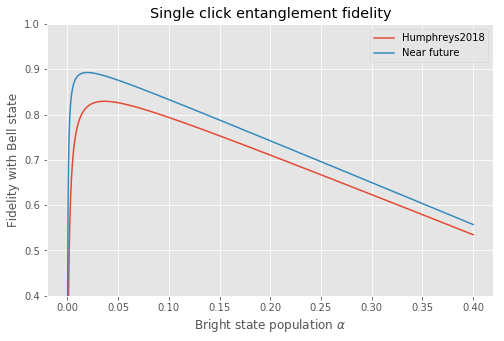

Humphreys2018 max fidelity: 0.829 at alpha 0.038
Fidelity after SCE: 0.872
Fidelity after double excitation: 0.840
Fidelity after phase uncertainty: 0.829

Near future max fidelity: 0.893 at alpha 0.020
Fidelity after SCE: 0.937
Fidelity after double excitation: 0.919
Fidelity after phase uncertainty: 0.893


In [16]:
# Combined plot for fidelities

alphas = np.geomspace(1e-5, 0.4, 100)
fids_old = np.zeros_like(alphas)
fids_new = np.zeros_like(alphas)

for i, alpha in enumerate(alphas):
    _, fids_old[i] = sim_rho_from_alpha(alpha)
    _, fids_new[i] = sim_rho_from_alpha(alpha, **near_future_params)

plt.figure(figsize=(8,5))    
plt.title(r'Single click entanglement fidelity')
plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'Fidelity with Bell state')
plt.ylim((0.4,1))
plt.plot(alphas, fids_old, label = 'Humphreys2018')
plt.plot(alphas, fids_new, label = 'Near future')
plt.legend()
plt.show()

print('Humphreys2018 max fidelity: {:.3f} at alpha {:.3f}'.format(np.max(fids_old), alphas[np.argmax(fids_old)]))
sim_rho_from_alpha(alphas[np.argmax(fids_old)], print_fids=True, return_fid=False);
print('')
print('Near future max fidelity: {:.3f} at alpha {:.3f}'.format(np.max(fids_new), alphas[np.argmax(fids_new)]))
sim_rho_from_alpha(alphas[np.argmax(fids_new)], print_fids=True, return_fid=False, **near_future_params)

# save best alpha for later simulations
best_alpha = alphas[np.argmax(fids_new)]

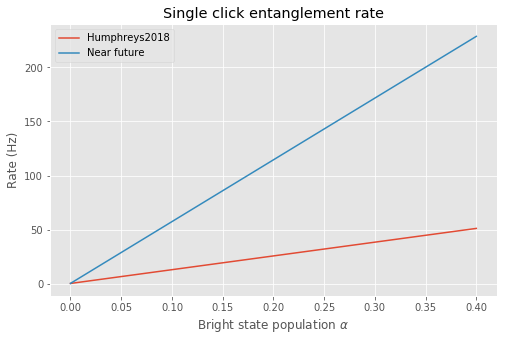

In [17]:
# Combined plots for rates 
rates_old = np.zeros_like(alphas)
rates_new = np.zeros_like(alphas)

for i, alpha in enumerate(alphas):
    rates_old[i] = sim_rate_from_alpha(alpha)
    rates_new[i] = sim_rate_from_alpha(alpha, **near_future_params)

plt.figure(figsize=(8,5))    
plt.title('Single click entanglement rate')
plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'Rate (Hz)')
plt.plot(alphas, rates_old, label = 'Humphreys2018')
plt.plot(alphas, rates_new, label = 'Near future')
plt.legend()
plt.show()

In [18]:
size = 50

slow_alpha = best_alpha
q1q3_ent_state, _ = sim_rho_from_alpha(slow_alpha, **near_future_params)

fast_alpha = np.linspace(0.001, 0.3, num=size)
fast_rate = sim_rate_from_alpha(fast_alpha, **near_future_params)
slow_rate = sim_rate_from_alpha(slow_alpha, **near_future_params)
fast_cycles = np.linspace(1, 1500, num=size, dtype=int)# 1. / fast_rate / 5.5E-6
# first index is alpha, second is cycles
prob_generation_before_timeout = 1 - np.exp(- fast_rate[:, np.newaxis] * near_future_params['ent_duration'] * fast_cycles) 

decohered_q1q3_ent_state = decohere(q1q3_ent_state, t=fast_cycles, t0=near_future_params['cycles_of_coherence'])

q2q4_ent_state = []

for alpha in fast_alpha:
    q2q4_ent_state += [sim_rho_from_alpha(alpha, return_fid=False, **near_future_params)]

from itertools import product

joint_state = np.zeros_like(prob_generation_before_timeout, dtype=type(q2q4_ent_state))
for i,j in product(range(size), range(size)):
    joint_state[i,j] = qt.tensor(decohered_q1q3_ent_state[j], q2q4_ent_state[i]).permute([0,2,1,3])
    joint_state[i,j] = elec_carb_gate * joint_state[i,j] * elec_carb_gate.dag()

final_state = np.zeros_like(prob_generation_before_timeout, dtype=type(q2q4_ent_state))
for i,j in product(range(size), range(size)):
    final_state[i,j] = (classical_feedback * joint_state[i,j] * classical_feedback.dag()).ptrace([0,1,2])

fids =  np.zeros_like(prob_generation_before_timeout)
for i,j in product(range(size), range(size)):
    fids[i,j] = fidelity(final_state[i,j], target_state)

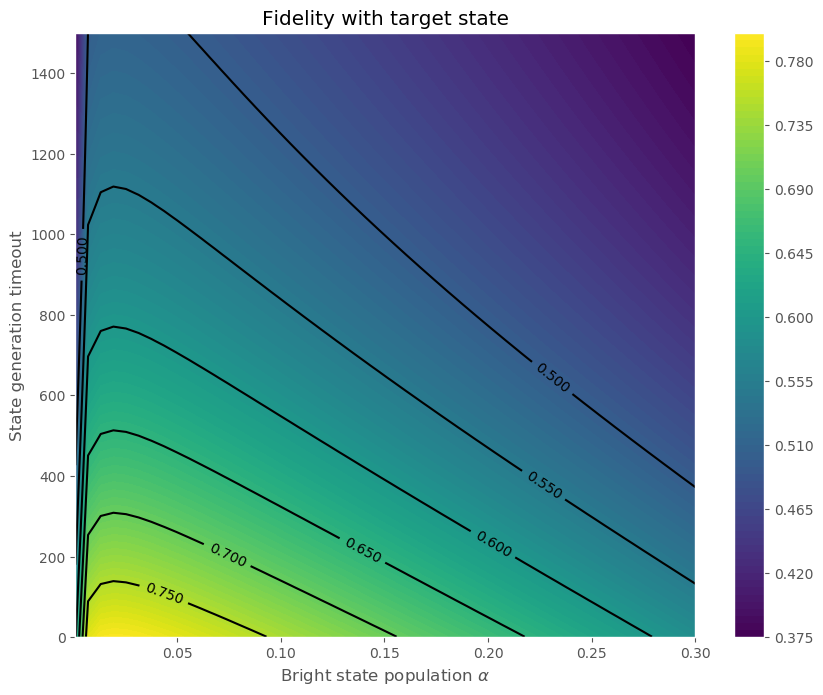

In [19]:
plt.figure(figsize=(10,8), dpi=100)
plt.title('Fidelity with target state')
# Need to transpose result matrix because numpy plots it as Z(N,M), len(X)=M and len(Y)=N
plt.contourf(fast_alpha, fast_cycles, fids.transpose(), levels=100)
plt.colorbar()
cont = plt.contour(fast_alpha, fast_cycles, fids.transpose(), colors='k', levels=np.arange(0.5, 0.8, 0.05))
plt.clabel(cont, inline=1, fontsize=10)
plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'State generation timeout')
plt.show()

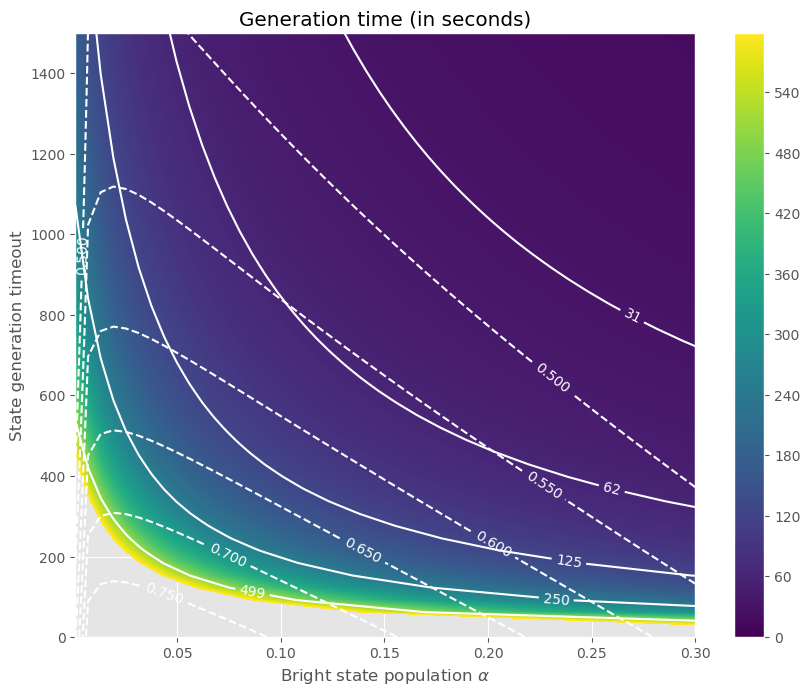

In [20]:
gen_time = 1/((1/fast_rate[:, np.newaxis] + 1/slow_rate) * (prob_generation_before_timeout))

from matplotlib.colors import LogNorm

plt.figure(figsize=(10,8), dpi=100)
plt.title('Generation time (in seconds)')
plt.contourf(fast_alpha, fast_cycles, gen_time.transpose(), levels = np.arange(0, 600, 1))
plt.colorbar()
plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'State generation timeout')

cont = plt.contour(fast_alpha, fast_cycles, fids.transpose(), colors='w', levels=np.arange(0.5, 0.8, 0.05), linestyles='dashed')
plt.clabel(cont, inline=1, fontsize=10)

cont_time = plt.contour(fast_alpha, fast_cycles, gen_time.transpose(), colors='w', levels = np.unique(np.geomspace(1,500,10, dtype=int)))
plt.clabel(cont_time, inline=1, fontsize=10, fmt="%d")

plt.show()

#### GHZ witness $\mathcal W_\text{GHZ}$

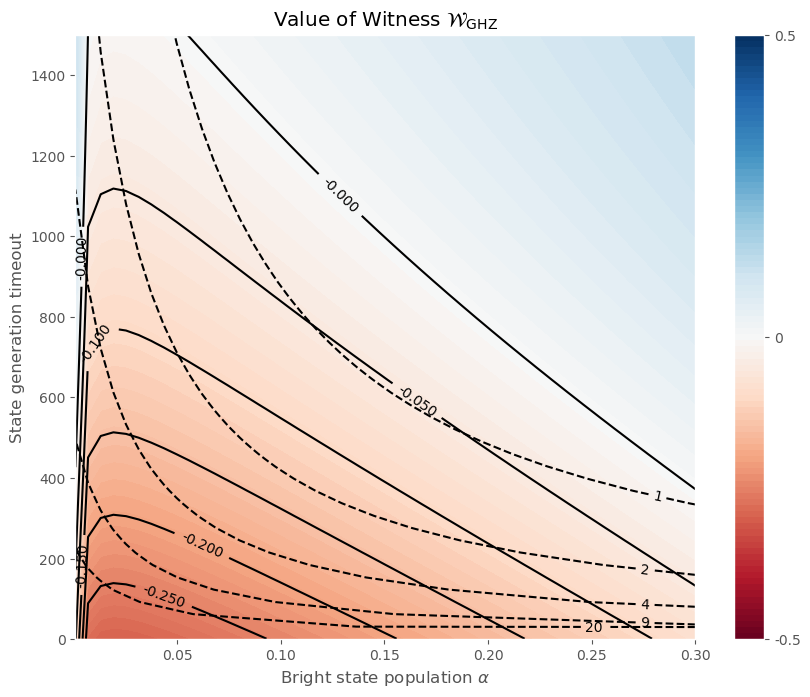

In [31]:
wit_ghz = 1/2 * qt.tensor([qt.identity(2)]*3) - target_state.proj()

size = 50

slow_alpha = best_alpha
q1q3_ent_state, _ = sim_rho_from_alpha(slow_alpha, **near_future_params)

# fast_alpha = np.linspace(0.001, 0.4, num=size)
# fast_rate = sim_rate_from_alpha(fast_alpha, **near_future_params)
# slow_rate = sim_rate_from_alpha(slow_alpha, **near_future_params)
# fast_cycles = np.linspace(1, 3000, num=size, dtype=int)# 1. / fast_rate / 5.5E-6
# first index is alpha, second is cycles
prob_generation_before_timeout = 1 - np.exp(- fast_rate[:, np.newaxis] * near_future_params['ent_duration'] * fast_cycles) 

decohered_q1q3_ent_state = decohere(q1q3_ent_state, t=fast_cycles, t0=near_future_params['cycles_of_coherence'])

q2q4_ent_state = []

for alpha in fast_alpha:
    q2q4_ent_state += [sim_rho_from_alpha(alpha, return_fid=False, **near_future_params)]

from itertools import product

joint_state = np.zeros_like(prob_generation_before_timeout, dtype=type(q2q4_ent_state))
for i,j in product(range(size), range(size)):
    joint_state[i,j] = qt.tensor(decohered_q1q3_ent_state[j], q2q4_ent_state[i]).permute([0,2,1,3])
    joint_state[i,j] = elec_carb_gate * joint_state[i,j] * elec_carb_gate.dag()

final_state = np.zeros_like(prob_generation_before_timeout, dtype=type(q2q4_ent_state))
for i,j in product(range(size), range(size)):
    final_state[i,j] = (classical_feedback * joint_state[i,j] * classical_feedback.dag()).ptrace([0,1,2])

wits =  np.zeros_like(prob_generation_before_timeout)
for i,j in product(range(size), range(size)):
    wits[i,j] = (final_state[i,j] * wit_ghz).tr()

plt.figure(figsize=(10,8), dpi=100)
plt.title(r'Value of Witness $\mathcal{W}_\mathrm{GHZ}$')
plt.contourf(fast_alpha, fast_cycles, wits.transpose(), levels=np.linspace(-0.5, 0.5, 100), cmap='RdBu')
cbar = plt.colorbar(ticks=[-0.5, 0, 0.5])
cbar.ax.set_yticklabels(['-0.5', '0', '0.5'])

cont = plt.contour(fast_alpha, fast_cycles, wits.transpose(), colors='black', levels=np.arange(-0.25, 0.05, 0.05), linestyles='solid')
plt.clabel(cont, inline=1, fontsize=10, colors='black')

cont_time = plt.contour(fast_alpha, fast_cycles, gen_time.transpose() / 60, colors='k', levels = np.unique(np.geomspace(1,20,5, dtype=int)), linestyles='dashed')
plt.clabel(cont_time, inline=1, fontsize=10, fmt="%d")

plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'State generation timeout')
plt.show() if True else plt.savefig('images/witness.pdf')
plt.close()

In [32]:
# Change operators to GHZ basis
# need to make hadamard on all of them.
# sigmax -> sigmaz
# sigmay -> -sigmay
# sigmaz -> sigmax

sx, sy, sz = qt.sigmax(), qt.sigmay(), qt.sigmaz()
szmy = (sz - sy)/np.sqrt(2)
szpy = (sz + sy)/np.sqrt(2)

In [33]:
witness_ops = [
    3 * qt.tensor([qt.identity(2), ]*3),
    -1 * qt.tensor(qt.identity(2), sx, sx),
    -1 * qt.tensor(sx, qt.identity(2), sx),
    -1 * qt.tensor(qt.identity(2), sx, sx),
    -2 * qt.tensor([sz, ]*3),
    np.sqrt(2)* qt.tensor([szmy, ]*3),
    np.sqrt(2)* qt.tensor([szpy, ]*3)
]

In [34]:
overall_op = None
for op in witness_ops:
    overall_op += op
overall_op /= 8.

In [35]:
from itertools import product
outcomes = np.array(tuple(product(range(2), repeat=3)))
outcomes[outcomes == 0]= -1
outcomes = -outcomes

In [26]:
opm = [
    qt.tensor(qt.identity(2), qt.rotation(sy, np.pi/2), qt.rotation(sy, np.pi/2)),
    qt.tensor(qt.rotation(sy, np.pi/2), qt.identity(2), qt.rotation(sy, np.pi/2)),
    qt.tensor(qt.rotation(sy, np.pi/2), qt.rotation(sy, np.pi/2), qt.identity(2)),
    qt.tensor(3 * [qt.identity(2)]),
    qt.tensor(3 * [qt.rotation(sx, -np.pi/4)]),
    qt.tensor(3 * [qt.rotation(sx, np.pi/4)]),
]

In [36]:
def RO_error(out, ROF_pos, ROF_neg):
    pos = out == 1
    neg = out == -1
    out[pos] = 2 * np.random.binomial(1, ROF_pos, out[pos].shape) - 1
    out[neg] = 1 - 2 * np.random.binomial(1, ROF_neg, out[neg].shape)
    return out

def simulate_witness_experiment(N, state, ROF_pos = 0.95, ROF_neg = 0.99):

    assert N%4==0, "N is not a multiple of 4"
    assert state.dims == qt.ket2dm(target_state).dims, "State is not in the right shape"
    
    msmt, std = np.zeros((2, len(opm)))

    # 0 
    probs = (opm[0] * state * opm[0].dag()).diag()
    choices = np.random.choice(np.arange(8), p=probs.real, size=N//4)
    outs = RO_error(outcomes[choices], ROF_pos, ROF_neg)
    msmt[0] = outs[:,[1,2]].prod(axis=1).mean()
    std[0] = outs[:,[1,2]].prod(axis=1).std() 

    # 1
    probs = (opm[1] * state * opm[1].dag()).diag()
    choices = np.random.choice(np.arange(8), p=probs.real, size=N//4)
    outs = RO_error(outcomes[choices], ROF_pos, ROF_neg)
    msmt[1] = outs[:,[0,2]].prod(axis=1).mean()
    std[1] = outs[:,[0,2]].prod(axis=1).std() 

    # 2
    probs = (opm[2] * state * opm[2].dag()).diag()
    choices = np.random.choice(np.arange(8), p=probs.real, size=N//4)
    outs = RO_error(outcomes[choices], ROF_pos, ROF_neg)
    msmt[2] = outs[:,[0,1]].prod(axis=1).mean()
    std[2] = outs[:,[0,1]].prod(axis=1).std() 

    # 3 
    probs = (opm[3] * state * opm[3].dag()).diag()
    choices = np.random.choice(np.arange(8), p=probs.real, size=N//4)
    outs = RO_error(outcomes[choices], ROF_pos, ROF_neg)
    msmt[3] = outs.prod(axis=1).mean()
    std[3] = outs.prod(axis=1).std() 

    # 4 
    probs = (opm[4] * state * opm[4].dag()).diag()
    choices = np.random.choice(np.arange(8), p=probs.real, size=N//4)
    outs = RO_error(outcomes[choices], ROF_pos, ROF_neg)
    msmt[4] = outs.prod(axis=1).mean()
    std[4] = outs.prod(axis=1).std() 

    # 5
    probs = (opm[5] * state * opm[5].dag()).diag()
    choices = np.random.choice(np.arange(8), p=probs.real, size=N//4)
    outs = RO_error(outcomes[choices], ROF_pos, ROF_neg)
    msmt[5] = outs.prod(axis=1).mean()
    std[5] = outs.prod(axis=1).std() 

    std /= np.sqrt(N//4)

    witness = (3 - msmt[0] - msmt[1] - msmt[2] - 2*msmt[3] + np.sqrt(2)*(msmt[4] + msmt[5])) / 8
    witstd = np.sqrt(std[0]**2 + std[1]**2 + std[2]**2 + 4*std[3]**2 + 2 * (std[4]**2 + std[5]**2)) / 8
    
    return witness, witstd
#     print('Witness value: {:.3f}'.format(witness))
#     print('Witness std: {:.3f}'.format(witstd))
#     print('Violation: {:.3f}'.format(witness/witstd))
#     print('Msmt time: {:.1f} days'.format(N * gen_time.transpose()[idxs] / 3600 /24))

In [37]:
simulate_witness_experiment(16000, qt.ket2dm(target_state), ROF_pos=0.99, ROF_neg=0.99)

(-0.4492926990144628, 0.0034476589940222483)

In [38]:
def round_to(x, base=4):
    return int(base * round(float(x)/base))

In [39]:
import scipy.stats
from tqdm import tqdm

In [80]:
%%time

from joblib import Parallel, delayed

days = 7
hours = 10
time = days * hours * 60 * 60

idxs = list(product(range(1,35), range(1, 20)))
Ns = [round_to((time / gen_time[idx])) for idx in idxs]
states = [final_state[idx] for idx in idxs]
zipped = list(zip(Ns, states))
sigma = 5

def evalute_p(data_tuple):
#     N = round_to((time / gen_time.transpose()[idx]))
    N = data_tuple[0]
    state = data_tuple[1]
    violation = np.zeros(250)
    for i in range(violation.size):
        wit, std = simulate_witness_experiment(N, state, ROF_pos=0.99, ROF_neg=0.99)
        violation[i] = wit/std
    ret_value = scipy.stats.norm(violation.mean(), violation.std()).cdf(-sigma)
    if np.isnan(ret_value):
        ret_value = 0
    return ret_value

results = Parallel(n_jobs=len(zipped), backend="threading")(
             map(delayed(evalute_p), zipped))

# days = 5
# hours = 10
# time = days * hours * 60 * 60
# p_v = np.zeros_like(gen_time)
# for idx in product(range(1,35), range(1, 35)):
#     N = round_to((time / gen_time.transpose()[idx]))
#     violation = np.zeros(30)
#     for i in range(30):
#         wit, std = simulate_witness_experiment(N, final_state[idx], ROF_pos=0.95, ROF_neg=0.99)
#         violation[i] = wit/std
#     p_v[idx] = scipy.stats.norm(violation.mean(), violation.std()).cdf(-5)
#     if np.isnan(p_v[idx]):
#         p_v[idx] = 0
#     print('{:.5f}'.format(scipy.stats.norm(violation.mean(), violation.std()).cdf(-5)))

Wall time: 9min 46s


In [81]:
p_v = np.zeros_like(gen_time)

for i, idx in enumerate(idxs):
    p_v[idx] = results[i]

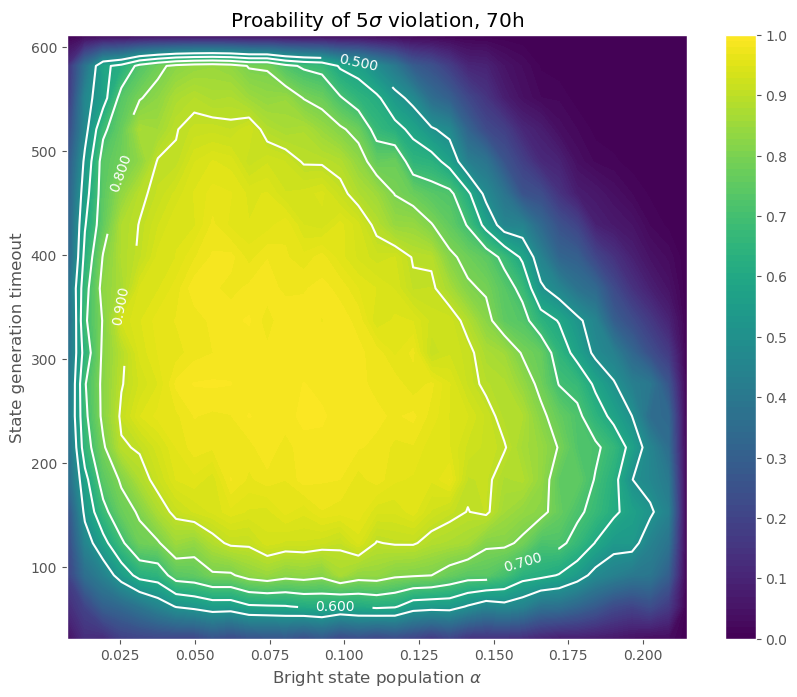

In [83]:
plt.figure(figsize=(10,8), dpi=100)
plt.contourf(fast_alpha, fast_cycles, p_v.transpose(), levels = np.linspace(0, 1, 100))
plt.colorbar(ticks = np.arange(0, 1.1, 0.1))

cont = plt.contour(fast_alpha, fast_cycles, p_v.transpose(), colors='w', levels=np.arange(0.5, 1.1, 0.1), linestyles='solid')
plt.clabel(cont, inline=1, fontsize=10, colors='white')

plt.title(r'Proability of ${}\sigma$ violation, {}h'.format(sigma, days*hours))
plt.xlim(fast_alpha[1], fast_alpha[35])
plt.ylim(fast_cycles[1], fast_cycles[20])
plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'State generation timeout')

# plt.show()
plt.savefig('images/violation70h_5sigma.pdf')